<a href="https://colab.research.google.com/github/kharisecario/practice/blob/gh-pages/ECG_T_wave_higher_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install heartpy
pip install biosppy

In [ ]:
import pickle
import sys
import numpy as np
import os
import scipy.signal as sg

from tqdm import tqdm
import numpy as np
import os
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
import time
import matplotlib.pyplot as plt
from scipy.signal import resample
import glob
import pywt
import pandas as pd
import matplotlib.pyplot as plt
import csv
from collections import Counter
import warnings
from IPython.display import display
%matplotlib inline
import shutil
import posixpath
# load Module
import json
import math
import heartpy as hp
from statsmodels.tsa.ar_model import AR
import glob
from sklearn.metrics import r2_score
import collections
from math import sqrt
from sklearn.metrics import mean_squared_error
import scipy.signal
from biosppy.signals import ecg
import gc
gc.enable()
pd.set_option('display.max_colwidth', None)
fs = 125

In [ ]:
# T wave high
data = pd.read_csv('https://raw.githubusercontent.com/CGproject-record/T_wave_high/main/%2328-0331_light.csv')
data

,II,ABP,PLETH,RESP
0,144,138,111,0
1,143,137,108,0
2,141,136,105,0
3,140,134,102,0
4,142,133,100,0
...,...,...,...,...
59995,118,177,76,1
59996,118,177,77,0
59997,118,177,80,0
59998,119,177,85,0


In [ ]:
 II_data = data['II']

In [ ]:
fs = 125

In [ ]:
signal = np.array(II_data[0:1200])

In [ ]:
signal1 =  signal[0:400]

<Figure size 640x480 with 0 Axes>

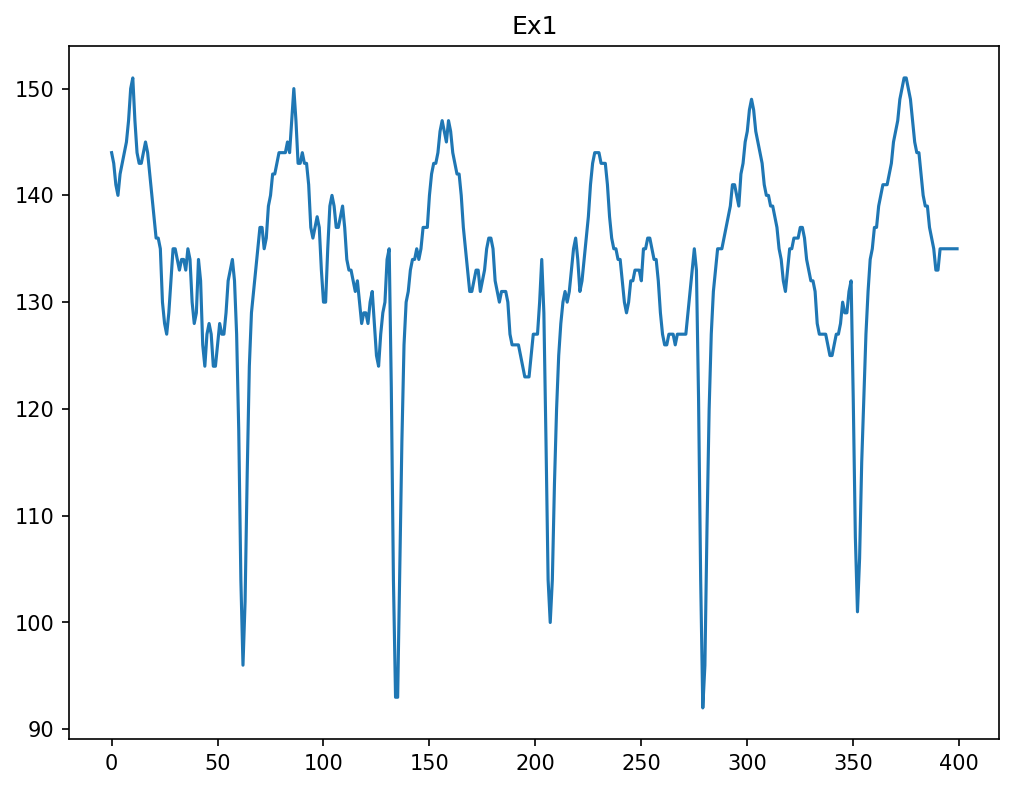

In [ ]:
plt.figure(1)
plt.figure(figsize=(8, 6), dpi=150)
plt.title('Ex1')
plt.plot(signal1)
plt.show()

In [ ]:
import heartpy as hp


<Figure size 640x480 with 0 Axes>

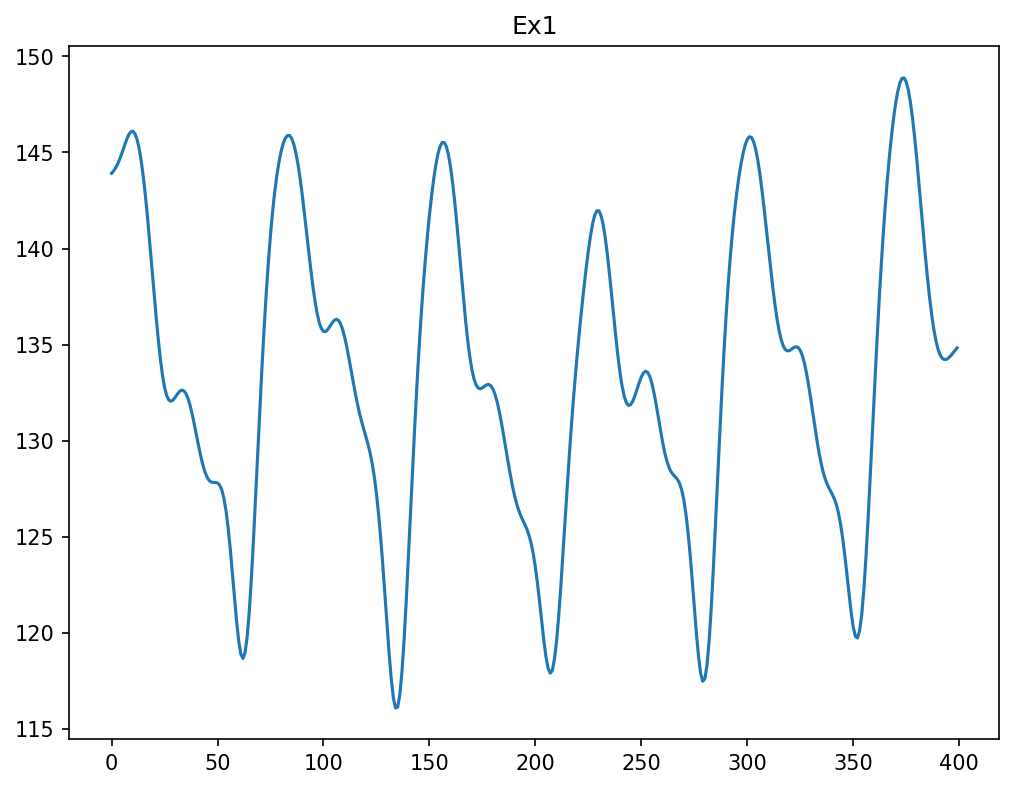

In [ ]:
filtered_lowpass = hp.filter_signal(signal1, cutoff = 6, sample_rate = 125, order = 3, filtertype='lowpass')
plt.figure(1)
plt.figure(figsize=(8, 6), dpi=150)
plt.title('Ex1')
plt.plot(filtered_lowpass)
plt.show()

<Figure size 640x480 with 0 Axes>

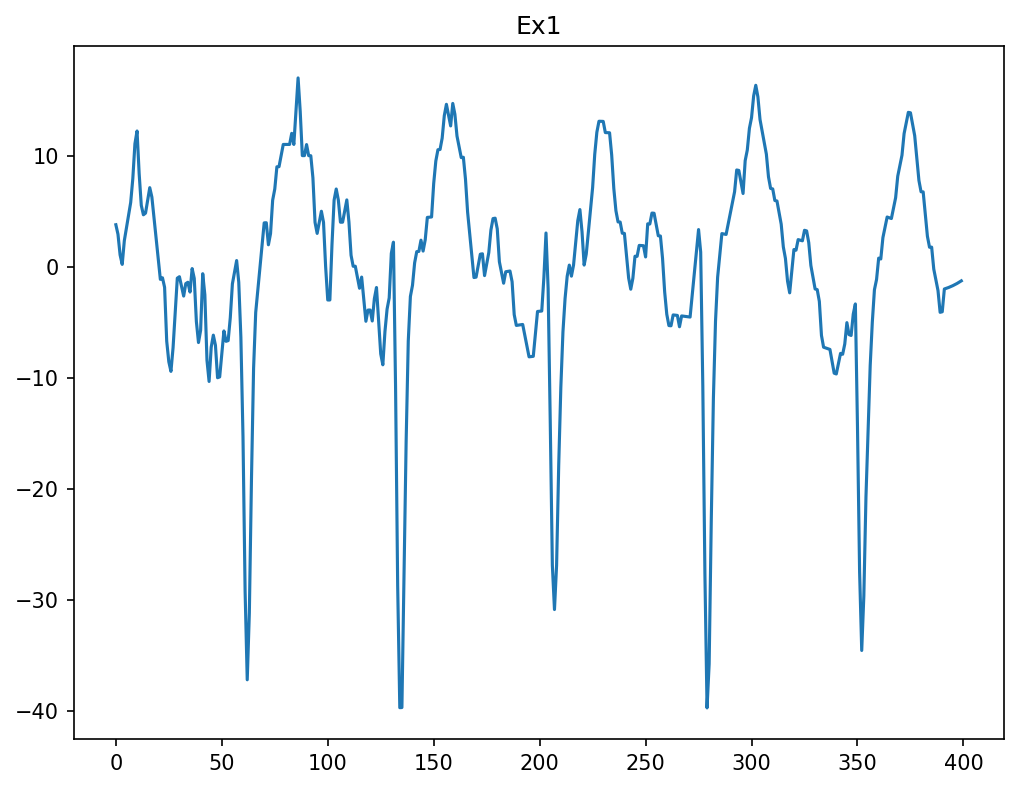

In [ ]:
filtered_highpass = hp.filter_signal(signal1, cutoff = 0.75, sample_rate = 125, order = 3, filtertype='highpass')

plt.figure(1)
plt.figure(figsize=(8, 6), dpi=150)
plt.title('Ex1')
plt.plot(filtered_highpass)
plt.show()

<Figure size 640x480 with 0 Axes>

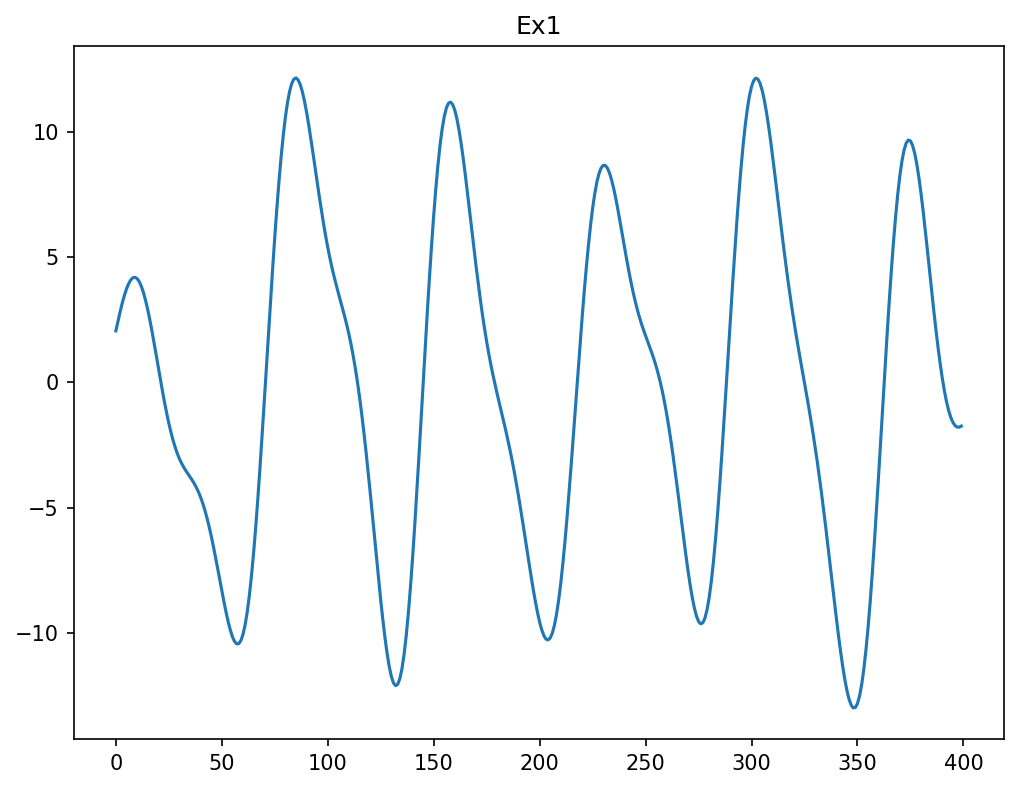

In [ ]:
filtered_bandpass = hp.filter_signal(signal1, cutoff = [0.75, 3.5], sample_rate = 125,order = 3, filtertype='bandpass')
plt.figure(1)
plt.figure(figsize=(8, 6), dpi=150)
plt.title('Ex1')
plt.plot(filtered_bandpass)
plt.show()

<Figure size 640x480 with 0 Axes>

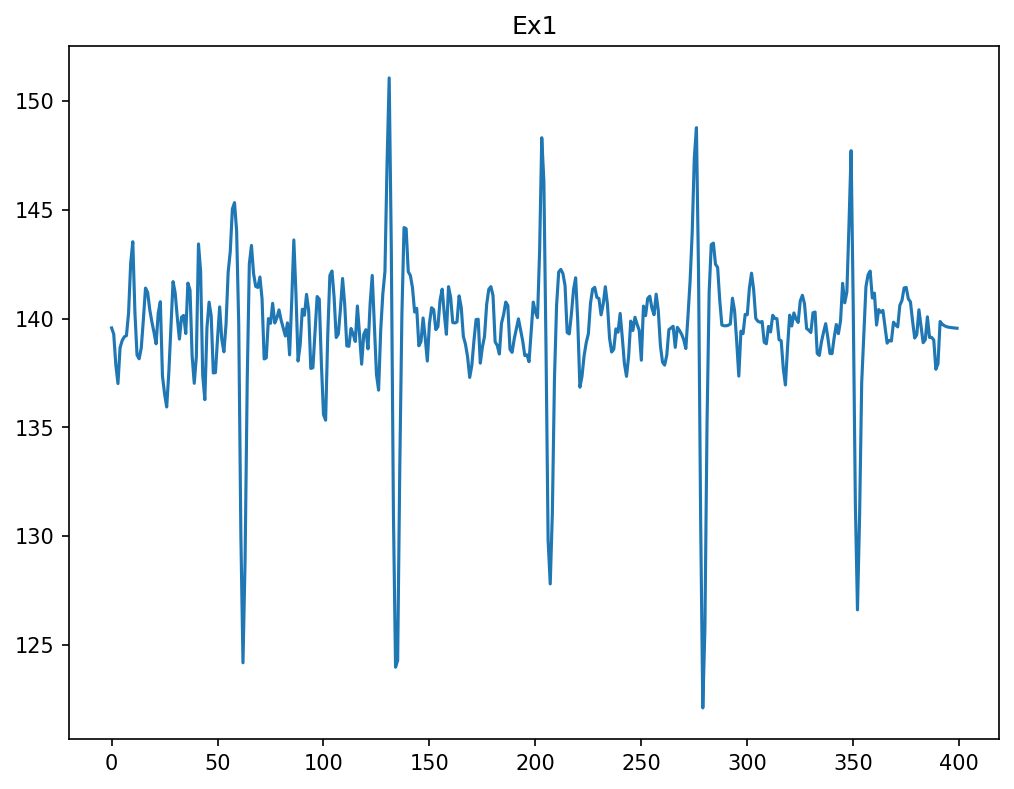

In [ ]:
filtered_north = hp.filter_signal(signal1, cutoff = 0.05, sample_rate = 125, filtertype='notch')
plt.figure(1)
plt.figure(figsize=(8, 6), dpi=150)
plt.title('Ex1')
plt.plot(filtered_north)
plt.show()

<Figure size 640x480 with 0 Axes>

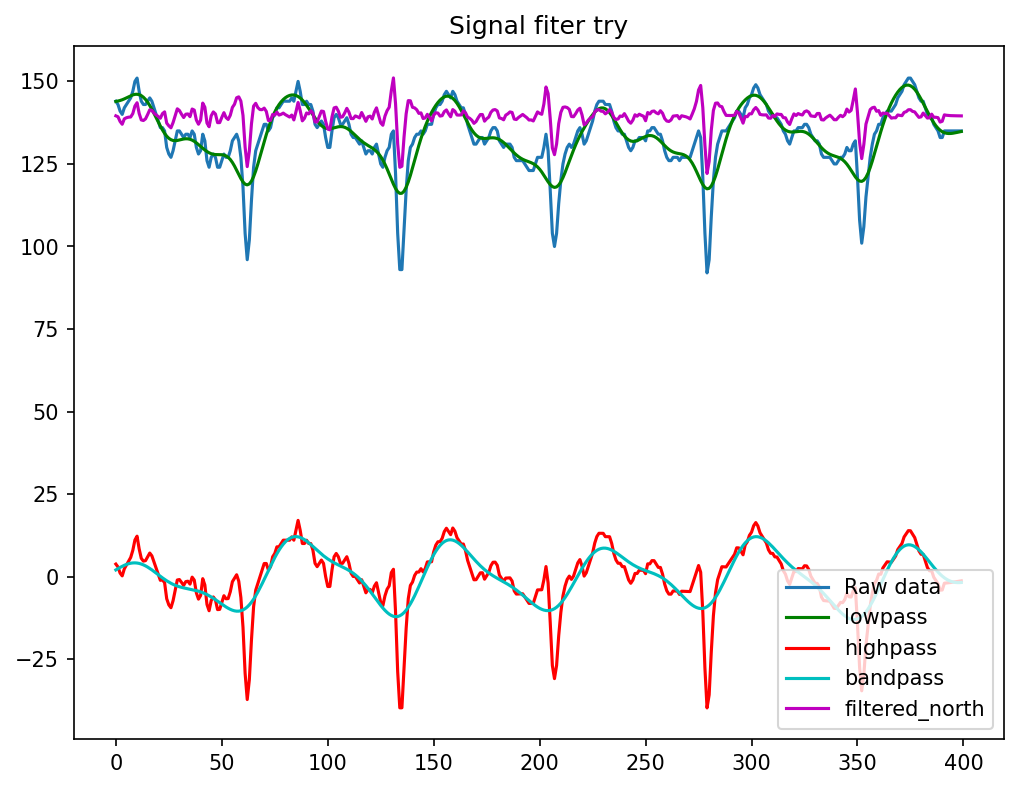

In [ ]:
# Plotting both the curves simultaneously
plt.figure(1)
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(signal1, label='Raw data')
plt.plot(filtered_lowpass, color='g', label='lowpass')
plt.plot(filtered_highpass, color='r', label='highpass')
plt.plot(filtered_bandpass, color='c', label='bandpass')
plt.plot(filtered_north, color='m', label='filtered_north')
#plt.xlabel("Angle")
#plt.ylabel("Magnitude")
plt.title("Signal fiter try")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='lower right')

# To load the display window
plt.show()

In [ ]:
def ecg_filter_plot(signal):

    filtered_lowpass = hp.filter_signal(signal, cutoff = 6, sample_rate = 125, order = 3, filtertype='lowpass')
    filtered_highpass = hp.filter_signal(signal, cutoff = 0.75, sample_rate = 125, order = 3, filtertype='highpass')
    filtered_bandpass = hp.filter_signal(signal, cutoff = [0.75, 3.5], sample_rate = 125,order = 3, filtertype='bandpass')
    filtered_north = hp.filter_signal(signal, cutoff = 0.05, sample_rate = 125, filtertype='notch')
    plt.figure(1)
    plt.figure(figsize=(8, 6), dpi=150)
    plt.plot(signal, label='Raw data')
    plt.plot(filtered_lowpass, color='g', label='lowpass')
    plt.plot(filtered_highpass, color='r', label='highpass')
    plt.plot(filtered_bandpass, color='c', label='bandpass')
    plt.plot(filtered_north, color='m', label='filtered_north')
    #plt.xlabel("Angle")
    #plt.ylabel("Magnitude")
    plt.title("Signal fiter try")

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend(loc='lower right')

    # To load the display window
    plt.show()

<Figure size 640x480 with 0 Axes>

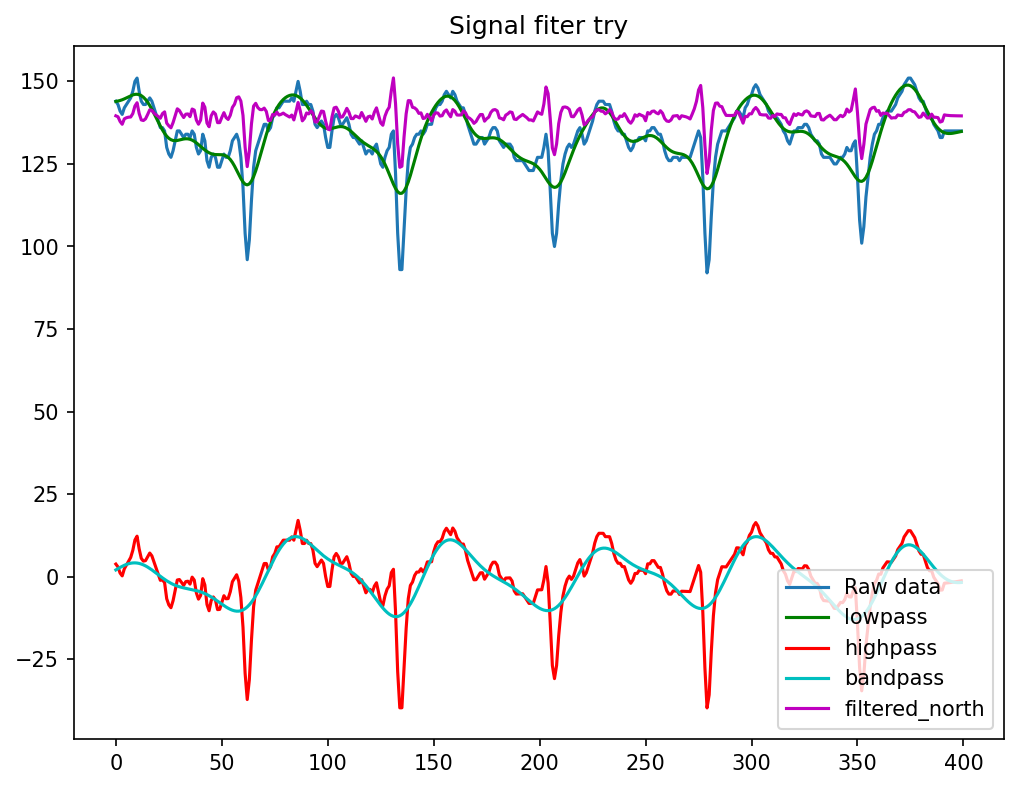

In [ ]:
ecg_filter_plot(signal1)

In [ ]:
signal2 = II_data[37500:38000]

In [ ]:
signal2

37500    135
37501    135
37502    135
37503    136
37504    138
        ... 
37995    123
37996    122
37997    123
37998    124
37999    114
Name: II, Length: 500, dtype: int64

<Figure size 640x480 with 0 Axes>

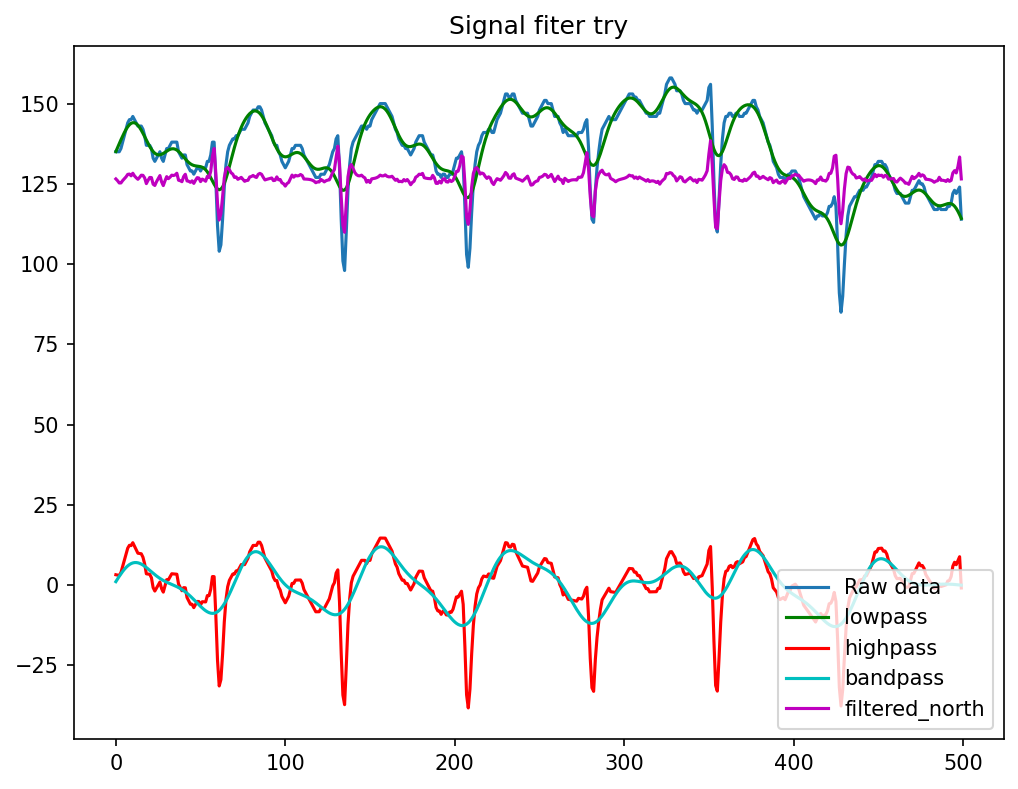

In [ ]:
ecg_filter_plot(np.array(signal2))

<Figure size 640x480 with 0 Axes>

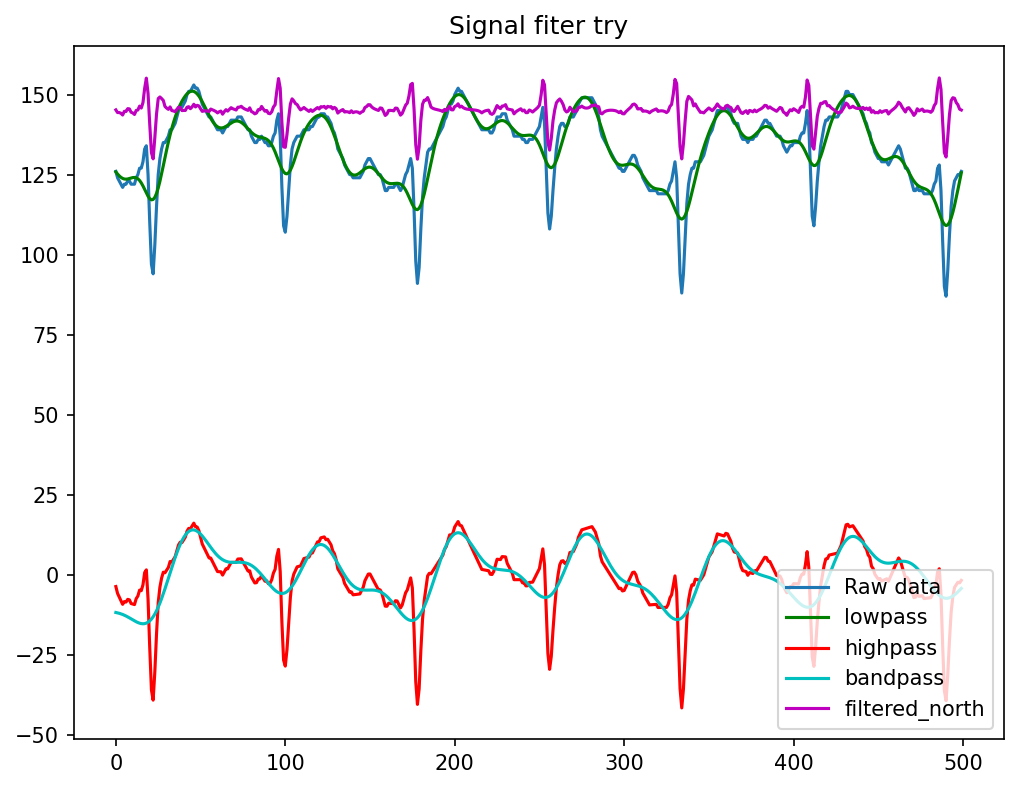

In [ ]:
signal3 = II_data[57500:58000]
ecg_filter_plot(np.array(signal3))

In [ ]:
# check normal
data = pd.read_csv('https://raw.githubusercontent.com/CGproject-record/T_wave_high/main/%2383-0523_light.csv')
data


,I,PLETH,RESP
0,130.0,116,119
1,128.0,114,118
2,127.0,112,117
3,126.0,111,116
4,125.0,109,115
...,...,...,...
59995,127.0,121,61
59996,130.0,119,61
59997,130.0,118,61
59998,127.0,117,61


In [ ]:
 I_data = data['I']

<Figure size 640x480 with 0 Axes>

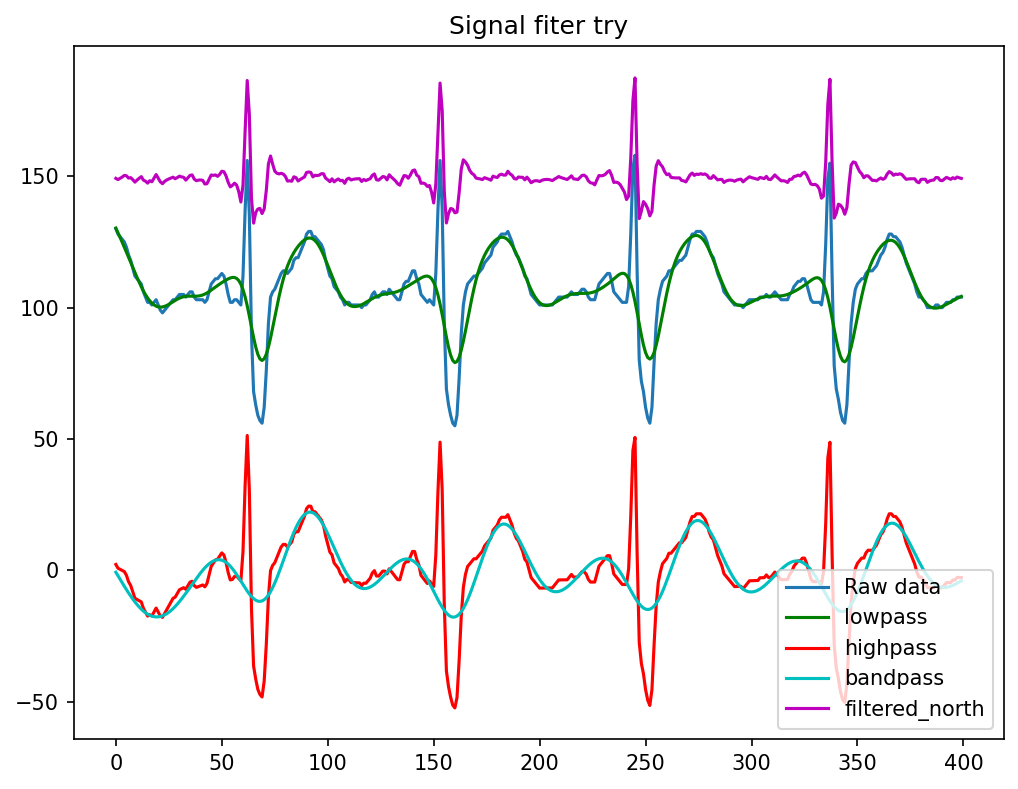

In [ ]:
signal1 = I_data[0:400]
ecg_filter_plot(np.array(signal1))

<Figure size 640x480 with 0 Axes>

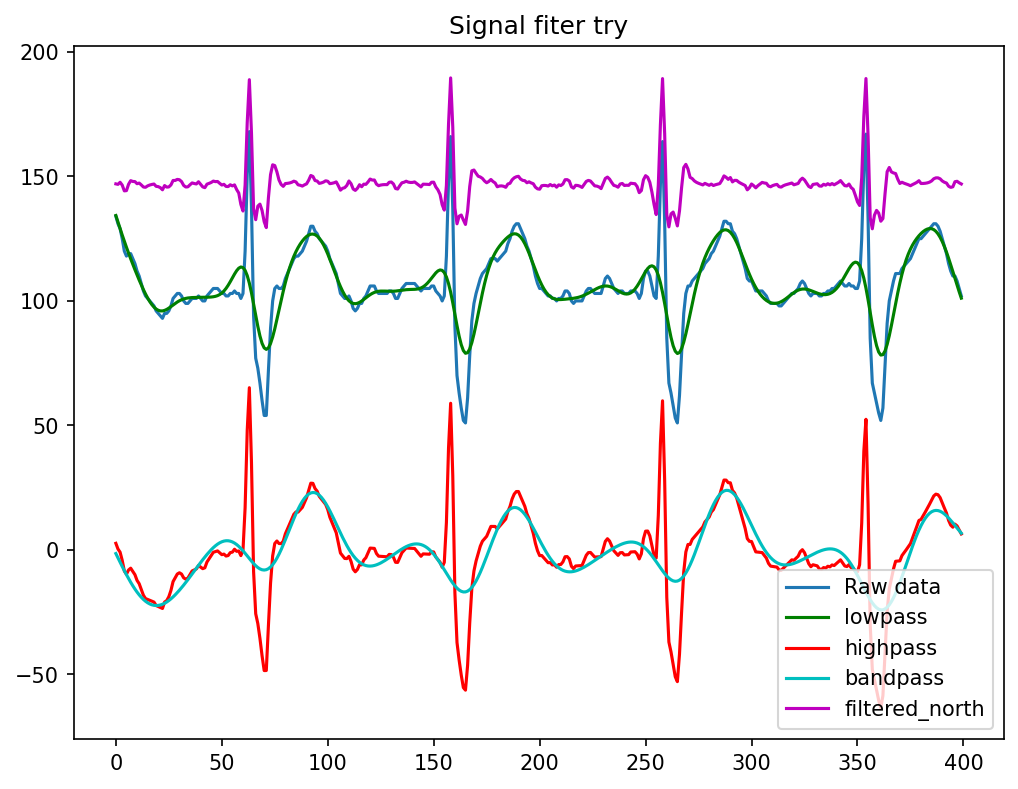

In [ ]:
signal2 = I_data[37500:37900]
ecg_filter_plot(np.array(signal2))

<Figure size 640x480 with 0 Axes>

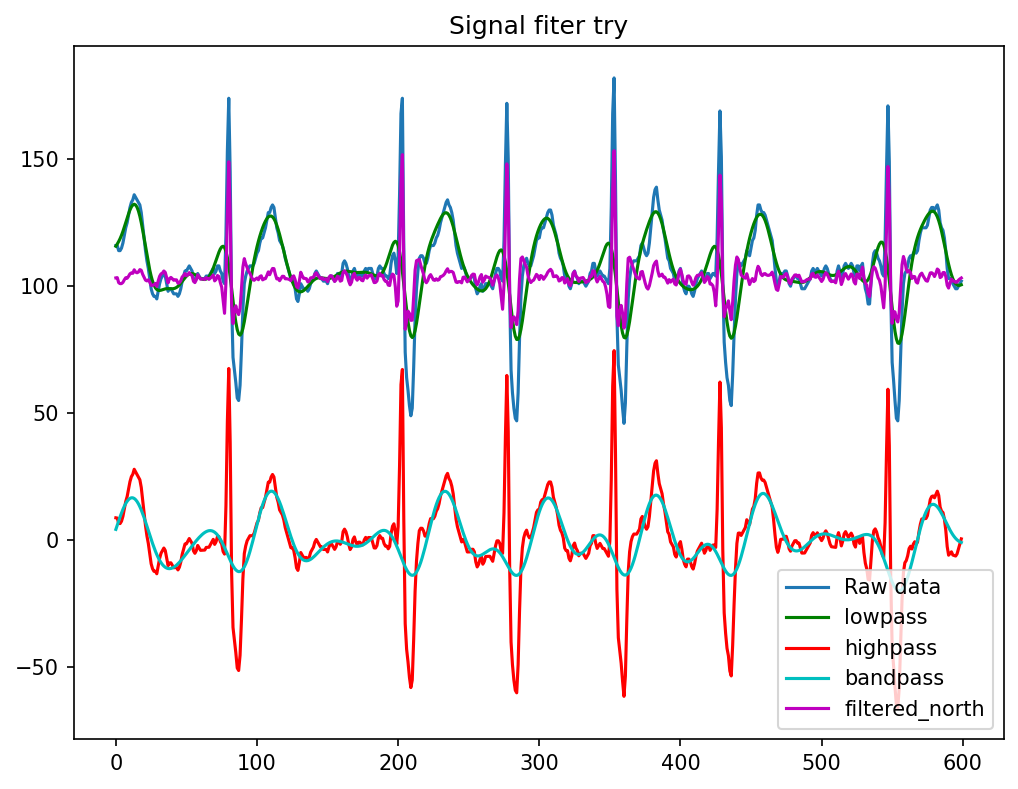

In [ ]:
signal3 = I_data[57300:57900]
ecg_filter_plot(np.array(signal3))